### **Preparation du fichier / Analyse**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("IMDB_RAW.csv")

# Rename the first two columns
df.rename(columns={df.columns[0]: "Text", df.columns[1]: "Label"}, inplace=True)

# Replace values in the Label column
df["Label"] = df["Label"].replace({"positive": "POS", "negative": "NEG"})

# Count duplicates before removing them
duplicates_count = df.duplicated(subset=["Text"]).sum()

# Remove duplicate rows based on the "Text" column
df.drop_duplicates(subset=["Text"], keep="first", inplace=True)

# Save the modified CSV file
#df.to_csv("IMDB_PN.csv", index=False)

print(f"Processing complete: Columns renamed, labels updated, and {duplicates_count} duplicate(s) removed.")

Processing complete: Columns renamed, labels updated, and 0 duplicate(s) removed.


Sentiment Distribution:
 Label
1    24884
0    24698
Name: count, dtype: int64


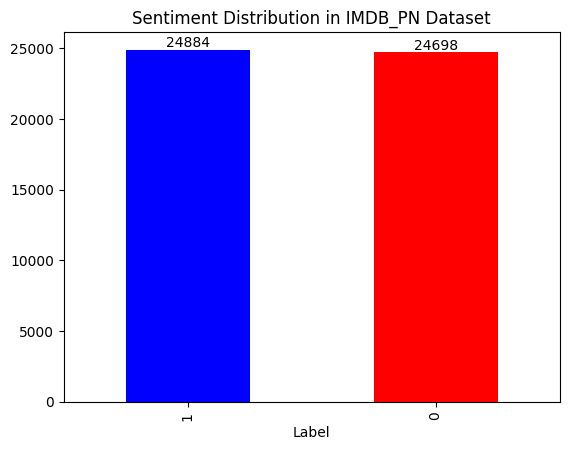

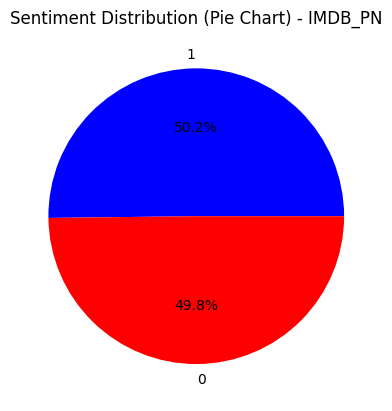

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
#df = pd.read_csv("IMDB_PN.csv")

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in IMDB_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - IMDB_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [ ]:
#df = pd.read_csv("IMDB_PN.csv")

# Convert POS → 1 and NEG → 0
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

df.to_csv("IMDB.csv", index=False)

### **Prétraitement**

In [ ]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_br_tags(text):
    if isinstance(text, str):
        return text.replace('<br />', ' ')
    return ''

def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return ''

def remove_non_latin(text):
    if isinstance(text, str):
        return re.sub(r'[^a-z\s]', ' ', text)  # Replace non-latin characters with a space
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_ENG_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return []

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_ENG(tokens):
    stemmer = PorterStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [ ]:
def IMDB_pretraitement(text):
    if isinstance(text, str):
        # Step 1: Remove <br /> tags
        text = remove_br_tags(text)

        # Step 4: Convert to lowercase
        text = convert_to_lowercase(text)

        # Step 5: Remove non-latin characters
        text = remove_non_latin(text)

        # Step 6: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 7: Remove English stopwords
        tokens = remove_ENG_stopwords(tokens)

        # Step 8: Apply stemming (Porter Stemmer for English)
        tokens = stemming_ENG(tokens)

        # Step 9: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [ ]:
print(f"Start processing IMDB ...\n")
IMDB = pd.read_csv("/content/IMDB.csv")
IMDB["Text"] = [IMDB_pretraitement(text) for text in df["Text"]]
IMDB.to_csv("/content/IMDB_Pre.csv", index=False)
print(f"Finished processing IMDB!\n")

Start processing IMDB ...

Finished processing IMDB!

